In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station


In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
recent_date_str = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]
print(recent_date_str)

2017-08-23


In [15]:
recent_date  = dt.date.fromisoformat(recent_date_str)
recent_date

datetime.date(2017, 8, 23)

In [16]:
# Calculate the date one year from the last date in data set.
year_before_date = recent_date - dt.timedelta(days=365)
year_before_date

datetime.date(2016, 8, 23)

<Axes: xlabel='Date', ylabel='Inches'>

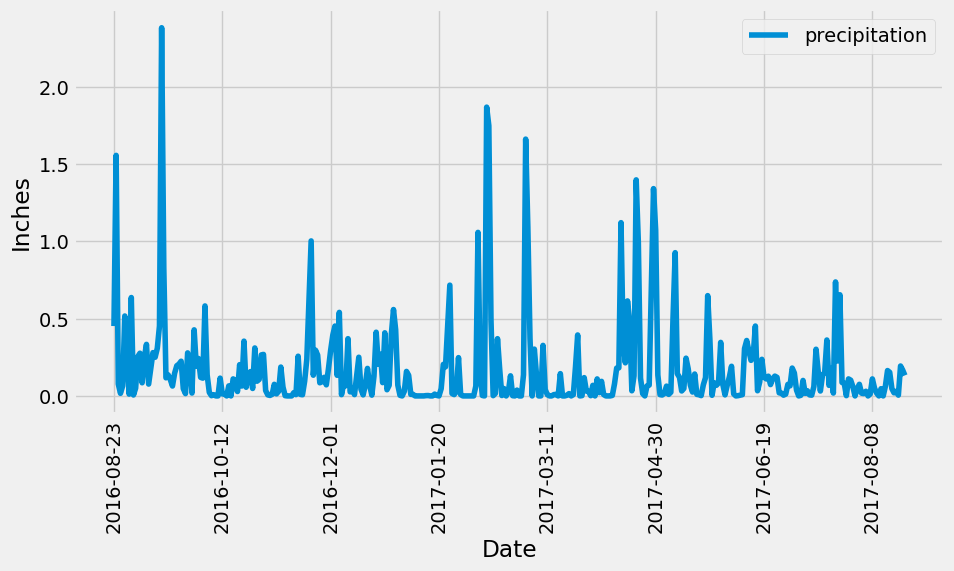

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Perform a query to retrieve the date and precipitation scores
last_12_months = session.query(measurement.date, func.avg(measurement.prcp)).\
                  filter(measurement.date >= year_before_date).\
                  group_by(measurement.date).\
                  order_by(measurement.date.asc()).\
                  all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(last_12_months, columns=['date','precipitation'])
df.set_index('date',  inplace=True)

# Sort the dataframe by date
df = df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90, xlabel = 'Date', ylabel='Inches', figsize=(10,5))

In [21]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,366.000000
mean,0.170757
std,0.295683
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


In [22]:
#print last_12_months
last_12_months 

[('2016-08-23', 0.45166666666666666),
 ('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 

In [24]:
#Convert the query results from your precipitation analysis (i.e. retrieve only the last 12 months of data)
#to a dictionary using date as the key and prcp as the value.
prcp = {}
for row in last_12_months:
    prcp[row[0]] = row[1]
print(prcp)

{'2016-08-23': 0.45166666666666666, '2016-08-24': 1.5549999999999997, '2016-08-25': 0.07714285714285715, '2016-08-26': 0.016666666666666666, '2016-08-27': 0.06399999999999999, '2016-08-28': 0.5166666666666666, '2016-08-29': 0.24333333333333332, '2016-08-30': 0.011666666666666667, '2016-08-31': 0.6359999999999999, '2016-09-01': 0.006, '2016-09-02': 0.05, '2016-09-03': 0.254, '2016-09-04': 0.276, '2016-09-05': 0.08499999999999999, '2016-09-06': 0.246, '2016-09-07': 0.3333333333333333, '2016-09-08': 0.07666666666666667, '2016-09-09': 0.17833333333333332, '2016-09-10': 0.27999999999999997, '2016-09-11': 0.25, '2016-09-12': 0.308, '2016-09-13': 0.45166666666666666, '2016-09-14': 2.3800000000000003, '2016-09-15': 0.8266666666666667, '2016-09-16': 0.11714285714285715, '2016-09-17': 0.13599999999999998, '2016-09-18': 0.10600000000000001, '2016-09-19': 0.064, '2016-09-20': 0.14714285714285716, '2016-09-21': 0.19499999999999998, '2016-09-22': 0.2057142857142857, '2016-09-23': 0.22428571428571428

# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count(station.station)).first()[0]
station_count

In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_count = session.query(measurement.station, func.count(measurement.station)).\
                    group_by(measurement.station).\
                    order_by(func.count(measurement.station).desc()).all()
station_count

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_temp = session.query(func.min(measurement.tobs)).filter(measurement.station == 'USC00519281').first()
max_temp = session.query(func.max(measurement.tobs)).filter(measurement.station == 'USC00519281').first()
avg_temp = session.query(func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').first()

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
data = session.query(measurement.tobs).\
        filter(measurement.station == 'USC00519281').\
        filter(measurement.date >= date).all()
station_df = pd.DataFrame(data, columns=['tobs'])

station_df.plot.hist(bins=12, figsize=(10, 5))
plt.xlabel('Temperature')

# Close Session

In [ ]:
# Close Session
session.close()